# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A Introduction to Data Science 

## Lecture 35 (Interpreting Machine Learning Models)

**Harvard University**<br>
**Fall 2020**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>


---

# Title

**Exercise**

# Description

For this exercise you will be working on a notebook in Ed to interpret various machine learning (ML) models: mostly a random forest and neural net model.  The steps of this notebook are:

1. Read and wrangle the data (the `Heart.csv` data we have used before
2. Fit 5 different ML models
3. Calculate the default variable importance measures for the tree-based models
4. Use `eli5` to calculate permutation importance measures.
5. Interpret the models based on the plots of predictions (how does Age relate to AHD): both at the means of the other variables and for every observation in the training data set.
6. Use `lime` to better understand how variables are related to the response for specific predictors.

# Hints:

<a href="https://eli5.readthedocs.io/en/latest/autodocs/permutation_importance.html" target="_blank">eli5.permutation_importance</a> : To get permutation importance metrics 

<a href="https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_tabular" target="_blank">lime.lime_tabular</a> : To get LIME explanations for a tabular data set like ours

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt

#from sklearn.linear_model import LogisticRegression
#from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import ensemble

# Here are the decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf

print(tf.__version__)  # You should see a 2.0.0 here!

# sns.set(style="ticks")
# %matplotlib inline

2.2.0


## Part 1: Data Wrangling

In [2]:
heart_df = pd.read_csv('data/Heart.csv')

In [3]:
print(heart_df.shape)
heart_df.head()

(303, 15)


Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

In [4]:
heart_df.describe()

Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000

In [5]:
X = heart_df[['Age','Sex','ChestPain','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca','Thal']]
y = 1*(heart_df['AHD']=='Yes')

In [6]:
#X['ChestPain']=X['ChestPain'].astype('category')
#X['ChestPain']=X['ChestPain'].cat.codes

#X['Thal']=X['Thal'].astype('category')
#X['Thal']=X['Thal'].cat.codes

In [7]:
X = X.assign(ChestPain=X['ChestPain'].astype('category').cat.codes)
X = X.assign(Thal=X['Thal'].astype('category').cat.codes)

In [8]:
X.describe()
X['Ca']=X['Ca'].fillna(0)

In [9]:
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(X.shape[0]), train_size=0.80)

X_train = X.iloc[itrain, :]
X_test = X.iloc[itest, :]
y_train = y.iloc[itrain]
y_test = y.iloc[itest]


**Q1.1**: How were the categorical variables handled?  How were missing values treated?  Were these wise choices?

*your answer here

---

## Part 2: Fitting Five ML Models

In [10]:
# fit a possibly underfit (depth = 3) decision tree classifier
dt3 = tree.DecisionTreeClassifier(max_depth = 3)
dt3.fit(X_train,y_train)

# fit an overfit (depth = 10) decision tree classifier
dt10 = tree.DecisionTreeClassifier(max_depth = 10)
dt10.fit(X_train,y_train)




DecisionTreeClassifier(max_depth=10)

In [11]:
# Evaluate using AUC

print("AUC on train for dt3:",sk.metrics.roc_auc_score(y_train,dt3.predict_proba(X_train)[:,1]))
print("AUC on test for dt3:",sk.metrics.roc_auc_score(y_test,dt3.predict_proba(X_test)[:,1]))

print("AUC on train for dt10:",sk.metrics.roc_auc_score(y_train,dt10.predict_proba(X_train)[:,1]))
print("AUC on test for dt10:",sk.metrics.roc_auc_score(y_test,dt10.predict_proba(X_test)[:,1]))



AUC on train for dt3: 0.9026515151515151
AUC on test for dt3: 0.9008620689655171
AUC on train for dt10: 1.0
AUC on test for dt10: 0.818426724137931


In [12]:
# fit random forest and adaboost models

np.random.seed(109)
randomforest = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=10)
randomforest.fit(X_train,y_train);

adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=4),
    n_estimators=1000,
    learning_rate=.8)
adaboost.fit(X_train,y_train);

In [13]:
# evaluate using AUC
print("AUC on train for randomforest:",sk.metrics.roc_auc_score(---,---)
print("AUC on test for randomforest:",sk.metrics.roc_auc_score(---,---)

print("AUC on train for adaboost:",sk.metrics.roc_auc_score(---,---)
print("AUC on test for adaboost:",sk.metrics.roc_auc_score(---,---)

AUC on train for randomforest: 1.0
AUC on test for randomforest: 0.9617456896551724
AUC on train for adaboost: 1.0
AUC on test for adaboost: 0.9267241379310345


In [14]:
# build a NN model

tf.random.set_seed(109)

NN_model = []
nodes_layers =[15,15] 

#reset the model 
NN_model = tf.keras.models.Sequential()

# input layers 
NN_model.add(tf.keras.layers.Dense(nodes_layers[0], activation='tanh', input_shape=(X_train.shape[1],)))

# hidden layers 
for s in nodes_layers[1:]:
    print(s)
    NN_model.add(tf.keras.layers.Dense(units = s,  activation = 'tanh'))

# output layer 
NN_model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))


# Summary 
NN_model.summary()

15
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 466
Trainable params: 466
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compile it and run it
# your code here 
X_test_std = ((X_test-X_train.mean(axis=0))/(X_train.std(axis=0)+0.2))
X_train_std = ((X_train-X_train.mean(axis=0))/(X_train.std(axis=0)+0.2))

batch_size = 32
epochs = 100



#opt = tf.keras.optimizers.SGD(lr=0.002,clipvalue=0.7)


NN_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

# fit it 
history_basic = NN_model.fit(X_train_std, y_train, 
                             batch_size=---, 
                             epochs=---,  
                             validation_split=.3, 
                             verbose=False)


In [16]:
print("AUC on train for NN_model:",sk.metrics.roc_auc_score(---,---)
print("AUC on test for NN_model:",sk.metrics.roc_auc_score(---,---)


AUC on train for NN_model: 0.9013774104683195
AUC on test for NN_model: 0.9461206896551724


**Q2.1**: Which model performs best?  Which models are overfit?  How do you know?

*your answer here

## Part 3: Variable Importance

/Users/kevinrader/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:590: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


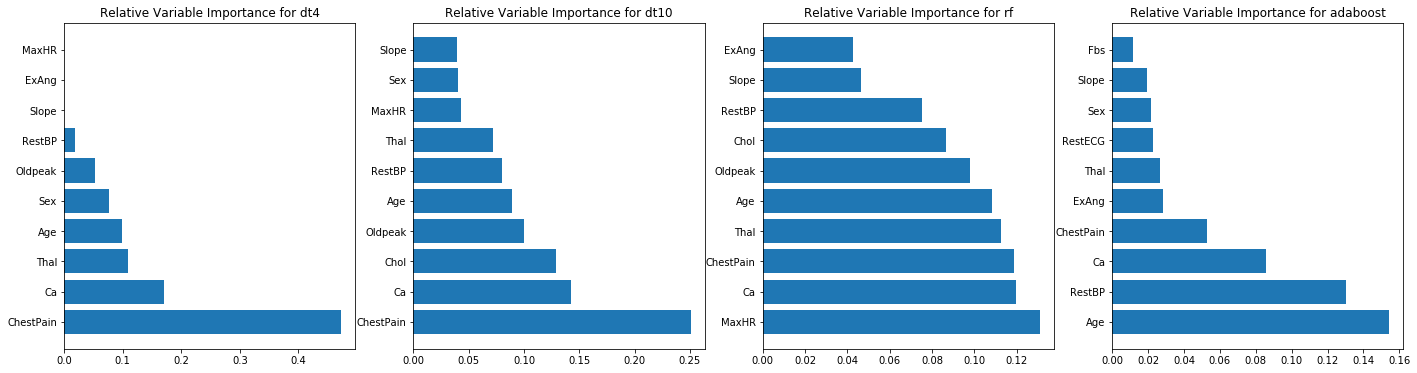

In [41]:
#Default Variable Importance

plt.figure(figsize=(24,6))
#plt.set_xticks()
#plt.set_xticklabels(X.columns)
num=10 

plt.subplot(1, 4, 1)
dt3_importances = dt3.feature_importances_
order = np.flip(np.argsort(dt3_importances))[0:num]
plt.barh(range(num),dt3_importances[order],tick_label=X.columns[order]);
plt.title("Relative Variable Importance for dt4")

plt.subplot(1, 4, 2)
dt10_importances = dt10.feature_importances_
order = np.flip(np.argsort(dt10_importances))[0:num]
plt.barh(range(num),dt10_importances[order],tick_label=X.columns[order]);
plt.title("Relative Variable Importance for dt10")

plt.subplot(1, 4, 3)
rf_importances = ---
order = ---
plt.barh(---,---);
plt.title("Relative Variable Importance for rf")

plt.subplot(1, 4, 4)
adaboost_importances = adaboost.feature_importances_
adaboost_importances = pd.Series(adaboost_importances).fillna(0)
order = np.flip(np.argsort(adaboost_importances))[0:num]
plt.barh(range(num),adaboost_importances[order],tick_label=X.columns[order]);
plt.title("Relative Variable Importance for adaboost");



**Q3.1**: How do these variable importance measures compare for these 4 models?  Which predictor is most important in general?  How is it related to `AHD`? 

*your answer here

---

## Part 4: Using Eli-5 

In [18]:
import eli5

/Users/kevinrader/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/kevinrader/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [57]:
#permutation importance for the random forest
from eli5.sklearn import PermutationImportance

seed = 42

perm = PermutationImportance(randomforest,random_state=seed,n_iter=10).fit(X_test, y_test)
eli5.show_weights(perm,feature_names=X.columns.tolist())
#eli5.explain_weights(perm, feature_names = X_train.columns.tolist())


In [58]:
#permutation importance for the NN model: need to define a scoring metric since there is no tf.score() by default

def aucscore(model, X, y):
    y_pred = model.predict(X)
    return sk.metrics.roc_auc_score(y, y_pred)

aucscore(NN_model,X_train_std, y_train)
perm = PermutationImportance(NN_model, random_state=seed,n_iter=10, scoring=---).fit(---,---)
eli5.show_weights(---,---)


**Q4.1**: How do the permutation importance measures compare to the default variable importance in the random forest?  How does the NN model compare to the random forest?

*your answer here

---

## Part 5: Plotting Predictions




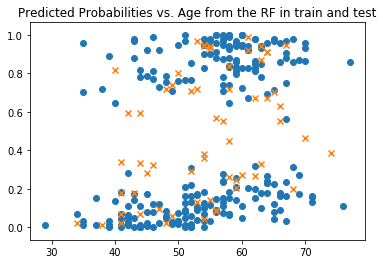

In [59]:
yhat_rf_train = randomforest.predict_proba(X_train)[:,1]
plt.scatter(X_train[['Age']],yhat_rf_train);
yhat_rf_test = randomforest.predict_proba(X_test)[:,1]
plt.scatter(X_test[['Age']],yhat_rf_test,marker='x');
plt.title("Predicted Probabilities vs. Age from the RF in train and test");

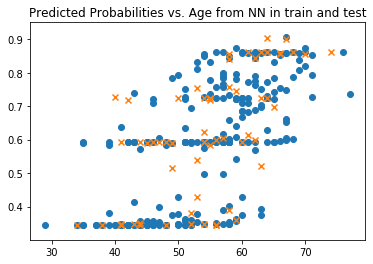

In [65]:
yhat_nn_train = NN_model.predict(---)
plt.scatter(---,---);
yhat_nn_test = NN_model.predict(---)
plt.scatter(---,---);
plt.title("Predicted Probabilities vs. Age from NN in train and test");

**Q5.1** How do the random forest and NN model compare in the interpretation of Age with AHD?  Which is more reliable?

*your answer here

In [27]:
# Create the data frame of means to do the prediction
means1 = X_train.mean(axis = 0)
means_df = (means1.to_frame()).transpose()

# Do the prediction at all observed ages
Ages = np.arange(np.min(X['Age']),np.max(X['Age']))
means_df  = pd.concat([means_df]*Ages.size,ignore_index=True)
means_df['Age'] = Ages


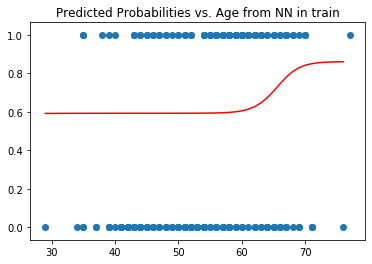

In [37]:
#plots at means
yhat_nn = NN_model.predict(means_df)
plt.scatter(X_train['Age'],y_train)
plt.plot(means_df['Age'],yhat_nn,color="red")
plt.title("Predicted Probabilities vs. Age from NN in train");

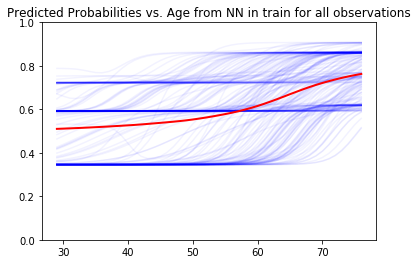

In [38]:
#Plots for all observations.  And then averaged

yhat_nns = []
for i in range(0,X_train.shape[0]):
    obs = X_train.iloc[i,:].to_frame().transpose()
    obs_df  = pd.concat([obs]*Ages.size,ignore_index=True)
    obs_df['Age'] = Ages
    yhat_nn = NN_model.predict_proba(obs_df)
    yhat_nns.append(yhat_nn.transpose())
    plt.plot(obs_df['Age'],yhat_nn,color='blue',alpha=0.05)

plt.plot(obs_df['Age'],np.mean(yhat_nns,axis=0)[0],color='red',linewidth=2);
    
plt.ylim(0,1)
plt.title("Predicted Probabilities vs. Age from NN in train for all observations");

**Q5.1** Interpret the two plots above.  What is the difference in the interpretations?  Is there anyu evidence of interaction effects between Age and the other predictors?  How do you know?

*your answer here

---

## Part 6: Using LIME

In [31]:
# pip install lime
import lime

In [42]:
from lime.lime_tabular import LimeTabularExplainer
#explainer = LimeTabularExplainer(X_train)#class_names = [0,1])

explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns,
                                 class_names = [0,1],
                                 mode='classification')


In [46]:
idx = 42

exp = explainer.explain_instance(X_train.values[idx], 
                                 randomforest.predict_proba, 
                                 num_features = 13)#X_train.values[idx].size)

print('Observation #: %d' % idx)
print('Probability(AHD) =', randomforest.predict_proba(X_train)[idx][1])
print('True class: %s' % y_train[idx])

Observation #: 42
Probability(AHD) = 0.32
True class: 0


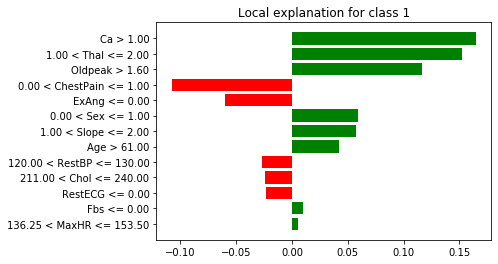

In [48]:
### Plot the results
# exp.as_list()
exp.as_pyplot_figure();

In [ ]:
# change the observation number and see what changes.
idx = ---
exp = explainer.explain_instance(X_train.values[idx], 
                                 randomforest.predict_proba, 
                                 num_features = 13)

print('Observation #: %d' % idx)
print('Probability(AHD) =', randomforest.predict_proba(X_train)[idx][1])
print('True class: %s' % y_train[idx])

In [ ]:
### Plot the results
# exp.as_list()
exp.as_pyplot_figure();

**Q6.1** Interpret the LIME results above.  Do they agree with the other interpretations for the random forest model seen so far?

*your answer here*